In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Read Image

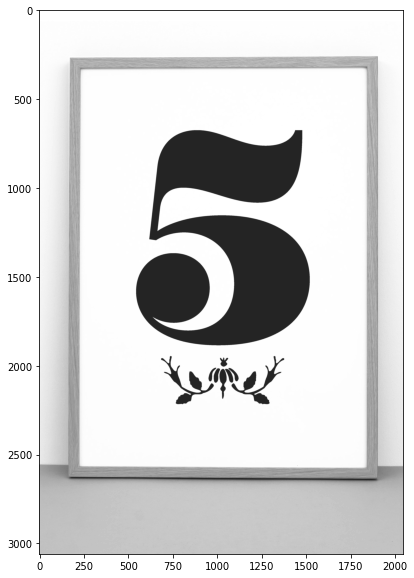

In [0]:
# read image from file path
# show the image
image = cv2.imread('number_5.jpg', cv2.IMREAD_GRAYSCALE).astype(float)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap='gray')

# CV2 function

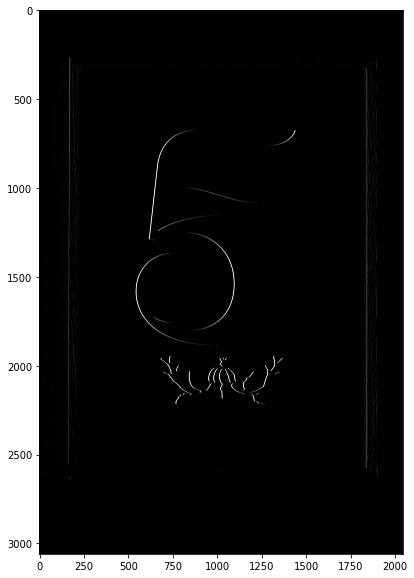

In [0]:
# 3x3 edge kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Find a function in cv2, which does 2D convolutional filter 
# The filter function should apply kernel on image
filtered = cv2.filter2D(image,-1,kernel)
plt.figure(figsize=(10,10))
plt.imshow(filtered,cmap='gray', vmin=0, vmax=255)

# Implement your functions

In [0]:
def zero_pad(image, num_pad):    
    """
    image - numpy array (height, width, channel)
    num_pad - number of zero padding
    
    padded -- padded image of shape (height + 2*pad, width + 2*pad, channel)
    """
    
    # Find a function in numpy that does zero padding
    padded = np.pad(image,num_pad,'constant')
    return padded

padded_image = zero_pad(image, 2)
print(image.shape)
print(padded_image.shape)

(3059, 2048)
(3063, 2052)


In [0]:
def slice_conv(image_slice, W, b):
    """
    Apply a filter W on a slide of the input image
    
    image_slice - slice of input data (kernel_size, kernel_size, channels)
    W - weight parameters of a filter or kernel (kernel_size, kernel_size, channels)
    b - bias parameters of a filter or kernel (1, 1, 1)
    
    conv_result - a scalar value, result of applying filter on a slice of the input data
    """

    # element-wise product between image_slice and W
    ele_product = np.multiply(image_slice, W)
    # sum of all products
    product_sum = np.sum(ele_product)
    # add bias 
    conv_result = product_sum + b

    return conv_result

In [0]:
def conv(image, W, b, stride, num_pad):
    """
    Forward propagation of a convolution layer
    
    image - output activations of the previous layer, numpy array of shape (pre_height, pre_width, pre_channels)
    W - weights (kernel_size, kernel_size, pre_channels, channels)
    b - biases (1, 1, 1, channels)
    stride - integer
    num_pad - integer
        
    feature_map - conv output, numpy array of shape (height, width, channels)
    """
    
    pre_height, pre_width, pre_channels = image.shape
    kernel_size, kernel_size, pre_channels, channels = W.shape
    
    # check if output size is valid
    assert(((pre_height-kernel_size+2*num_pad)/stride).is_integer())

    height = int((pre_height-kernel_size+2*num_pad)/stride)+1
    width = height # we assume height and width are the same

    # Initialize the output feature map
    feature_map = np.zeros((height, width, channels))
    # zero padding
    padded_image = zero_pad(image, num_pad)
  
    for h in range(height):            # loop over vertical axis
        for w in range(width):         # loop over horizontal axis
            for c in range(channels):  # loop over number of filters
                # a slice of the image
                image_slice = padded_image[h*stride:h*stride+kernel_size,w*stride:w*stride+kernel_size,:]
                # Convolve the slice with W and b
                feature_map[h, w, c] = slice_conv(image_slice,W[:,:,:,c],b[:,:,:,c])
    return feature_map

In [0]:
def pool(image, pooling_size, stride):
    pre_height, pre_width, pre_channels = image.shape
    
    height = int((pre_height - pooling_size) / stride + 1)
    width = height

    channels = pre_channels
    feature_map = np.zeros((height, width, channels))
    
    for h in range(height):                 
        for w in range(width):             
            for c in range(channels):                  
                image_slice = image[h*stride:h*stride+pooling_size,w*stride:w*stride+pooling_size,:]
                feature_map[h, w, c] = np.max(image_slice)
    return feature_map

# Visualize your results

(151, 151, 1)


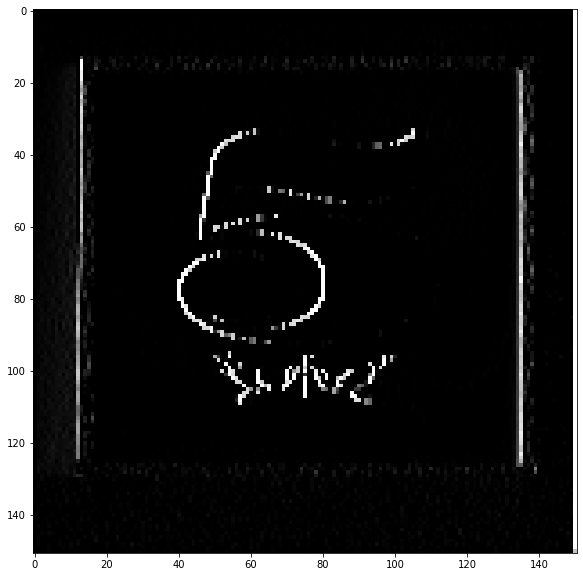

In [0]:
# 3x3x1 edge kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

resized_image = cv2.resize(image, (299, 299), interpolation=cv2.INTER_CUBIC)[..., np.newaxis]
kernel = kernel.reshape(kernel.shape[0],kernel.shape[1],1,1)
filtered = conv(resized_image, kernel, np.array(0).reshape(1,1,1,1), 2, 2)
plt.figure(figsize=(10,10))
plt.imshow(filtered[:,:,0],cmap='gray', vmin=0, vmax=255)
print(filtered.shape)

(75, 75, 1)


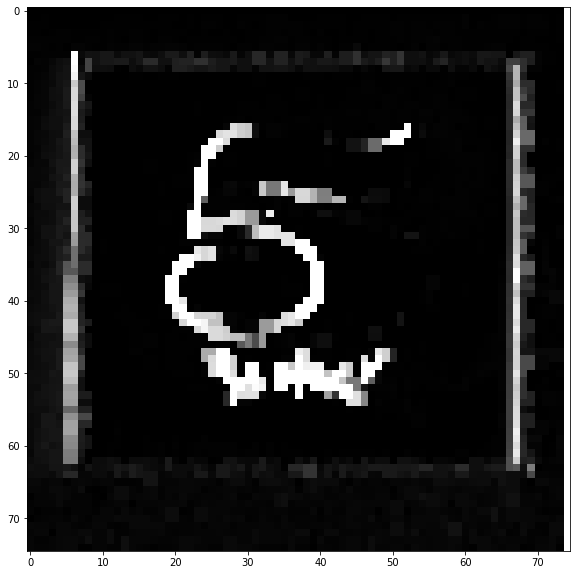

In [0]:
pooling = pool(filtered, 3, 2)
plt.figure(figsize=(10,10))
plt.imshow(pooling[:,:,0],cmap='gray', vmin=0, vmax=255)
print(pooling.shape)